In [130]:
# Importing Dependencies 
import numpy as np
import pandas as pd
import librosa 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.ticker as mticker

from scipy.io import wavfile


figures for report

In [131]:
# data paths
DEV_DATA_PATH = "data/development.csv"   
EVAL_DATA_PATH = "data/evaluation.csv"  

# load datasets
df_dev = pd.read_csv(DEV_DATA_PATH, index_col='Id') 
df_eval = pd.read_csv(EVAL_DATA_PATH, index_col='Id')

# simple transformations inferred from first exploration of the data
def preprocess_and_transform_columns(df):
    df = df.rename(columns={"age": "target"})  # Rename 'age' to 'target'
    df = df.drop(columns=["sampling_rate", "path"])  # Remove unnecessary columns
    df["tempo"] = df["tempo"].apply(lambda x: float(x[1:-1]))  # Transform 'tempo' values from 'str' to 'float'
    df["gender"] = df["gender"].replace("famale", "female") # Single typo in evaluation dataset
    return df

df_dev = preprocess_and_transform_columns(df_dev)
df_eval = preprocess_and_transform_columns(df_eval)

df_dev_copy = df_dev.copy()
df_eval_copy = df_eval.copy()

int16


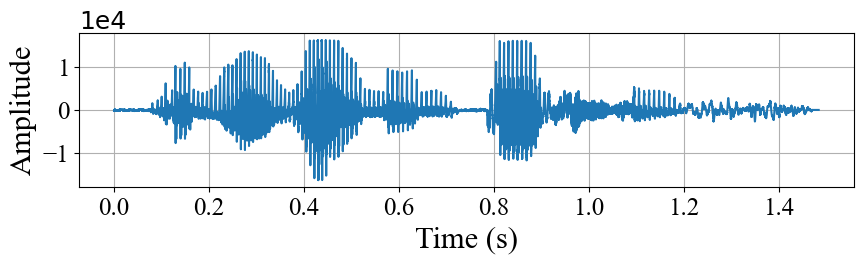

In [136]:
path_audio = 'data/audios_development/10.wav'
sr, audio_wav = wavfile.read(path_audio)
print(audio_wav.dtype)
audio_wav_mono = audio_wav.sum(axis=1)/2

mpl.rcParams["font.size"] = 18

fig, ax = plt.subplots(1, figsize=(10,2))

v = audio_wav_mono

time = np.arange(v.size)/sr
ax.plot(time, v)
ax.grid(visible=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.set_xlabel('Time (s)', fontsize=22, fontname='Times New Roman')
ax.set_ylabel('Amplitude', fontsize=22, fontname='Times New Roman')
plt.xticks(fontsize=18, color='black', fontname='Times New Roman')
plt.yticks(fontsize=18, color='black', fontname='Times New Roman')
plt.show()
fig.savefig("figs/audio_track.pdf", bbox_inches="tight")

In [133]:
from utils import audio_preprocessing as ap

input_file = "data/audios_development/9.wav"
def plot_audio(y, sr=22050, c='b', s=False, ax=None, title='Audio Signal'):
    if ax == None:
        fig, ax = plt.subplots(1, figsize=(10,3))
    if s:
        ax.plot(np.arange(y.size)/sr, y, c=c)
    else:
        ax.plot(y, c=c)
    ax.title.set_text(title)
    return ax

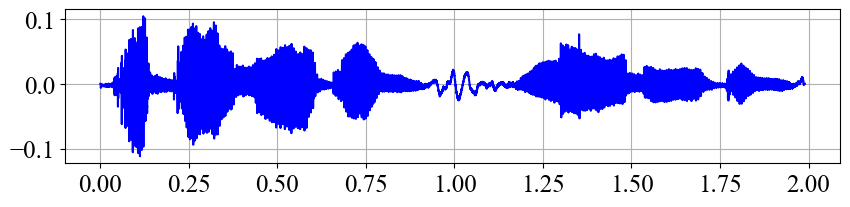

In [135]:
y, sr = librosa.load(input_file)
fig, ax = plt.subplots(1, figsize=(10,2))
ax.grid(visible=True)
# plot_audio(y, c='orange', s=True, ax=ax, title = 'Original Audio')
plot_audio(y, c='blue', s=True, ax=ax, title = '')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(fontsize=18, color='black', fontname='Times New Roman')
plt.yticks(fontsize=18, color='black', fontname='Times New Roman')
plt.show()
fig.savefig("figs/audio_track_original.pdf", bbox_inches="tight")

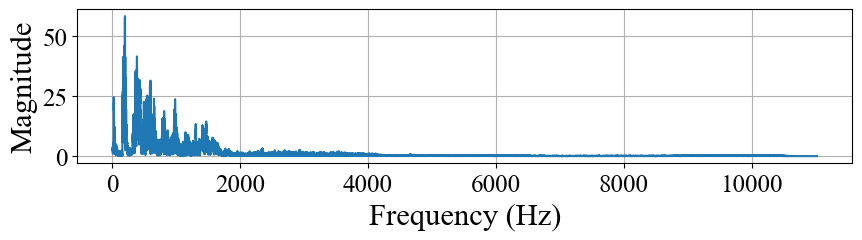

In [137]:
y, sr = librosa.load(input_file)

fft = np.fft.fft(y)  
magnitude = np.abs(fft)  
frequency = np.fft.fftfreq(len(magnitude), 1/sr)


positive_freq_idx = frequency > 0
frequency = frequency[positive_freq_idx]
magnitude = magnitude[positive_freq_idx]


fig, ax = plt.subplots(1, figsize=(10,2))
plt.plot(frequency, magnitude)
plt.grid(visible=True)
plt.xticks(fontsize=18, color='black', fontname='Times New Roman')
plt.yticks(fontsize=18, color='black', fontname='Times New Roman')
plt.xlabel('Frequency (Hz)', fontsize=22, fontname='Times New Roman')
plt.ylabel('Magnitude', fontsize=22, fontname='Times New Roman')
fig.savefig("figs/audio_track_original_frequency.pdf", bbox_inches="tight")
plt.show()


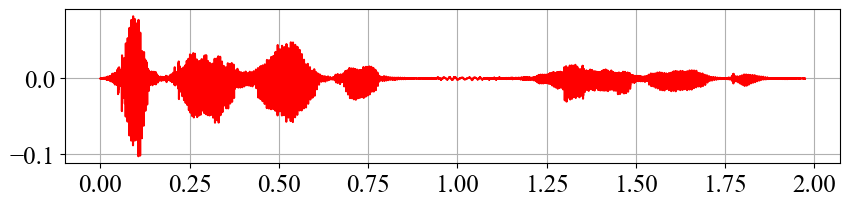

In [36]:
y_noise = ap.reduce_noise(y=y, sr=sr)
y_filter = ap.bandpass_filter(y=y_noise, sr=sr)

fig, ax = plt.subplots(1, figsize=(10,2))
ax.grid(visible=True)
# plot_audio(y_filter, c='red', s=True, ax=ax, title = 'Filtered Audio')
plot_audio(y_filter, c='red', s=True, ax=ax, title = '')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(fontsize=18, color='black', fontname='Times New Roman')
plt.yticks(fontsize=18, color='black', fontname='Times New Roman')
plt.show()
fig.savefig("figs/audio_track_filtered.pdf", bbox_inches="tight")

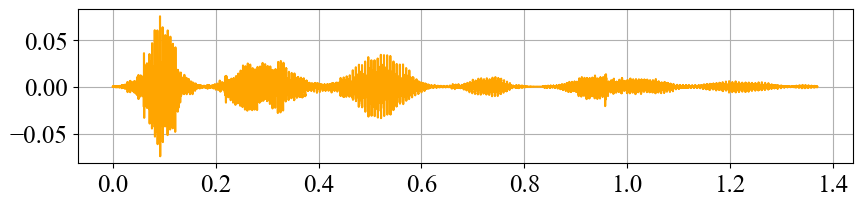

In [107]:
y_processed = ap.process_audio(y=y_filter, sr=sr, top_db=20)

fig, ax = plt.subplots(1, figsize=(10,2))
# plot_audio(y_processed, c='orange', s=True, ax=ax, title = 'Processed Audio')
plot_audio(y_processed, c='orange', s=True, ax=ax, title = '')
ax.grid(visible=True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.xticks(fontsize=18, color='black', fontname='Times New Roman')
plt.yticks(fontsize=18, color='black', fontname='Times New Roman')
plt.show()
fig.savefig("figs/audio_track_processed.pdf", bbox_inches="tight")

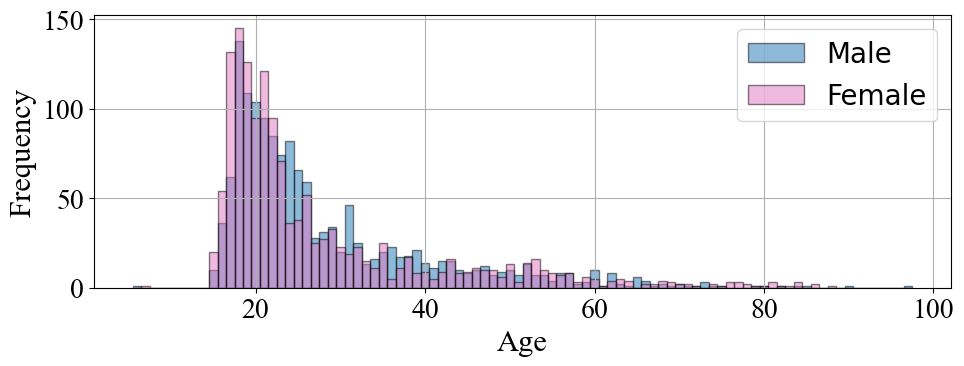

In [38]:
dev_gender = df_dev_copy["gender"].copy()
eval_gender = df_eval_copy["gender"].copy()

dev_labels, dev_sizes = dev_gender.value_counts().index, dev_gender.value_counts().values
eval_labels, eval_sizes = eval_gender.value_counts().index, eval_gender.value_counts().values

TARGET = df_dev_copy["target"].copy()

age_male = TARGET[df_dev_copy["gender"] == "male"]
age_female = TARGET[df_dev_copy["gender"] == "female"]

# bins for both distributions
bins = np.arange(min(age_male.min(), age_female.min()) - 0.5, 
                 max(age_male.max(), age_female.max()) + 1.5, 1)

plt.figure(figsize=(10, 4))
plt.hist(age_male, bins=bins, edgecolor="black", align="mid", color="tab:blue", alpha=.5, label="Male")
plt.hist(age_female, bins=bins, edgecolor="black", align="mid", color="tab:pink", alpha=.5, label="Female")
# plt.title("Age Distribution by Gender (Development Dataset)")
plt.xlabel("Age", fontsize=22, fontname='Times New Roman')
plt.ylabel("Frequency", fontsize=22, fontname='Times New Roman')
plt.legend(fontsize=20)
plt.xticks(fontsize=20, color='black', fontname='Times New Roman')
plt.yticks(fontsize=20, color='black', fontname='Times New Roman')
plt.tight_layout()
plt.grid()
plt.savefig("figs/age_distribution.pdf", bbox_inches="tight")
plt.show()

Total unique outliers: 204
Common outliers: 26


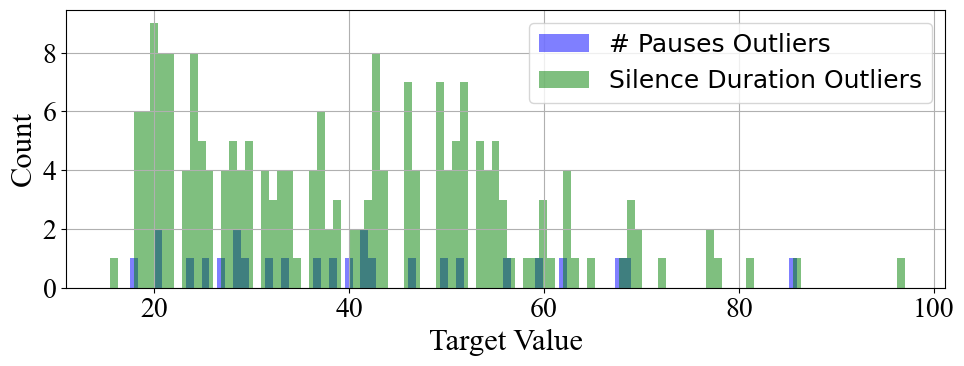

In [84]:
num_pauses_outliers = df_dev_copy["num_pauses"] > 57 # Over 99th percentile
silence_duration_outliers = df_dev_copy["num_pauses"] > 37.87 # Over 99th percentile

total_unique_outliers = (num_pauses_outliers | silence_duration_outliers).sum()
common_outliers = (num_pauses_outliers & silence_duration_outliers).sum()

print(f"Total unique outliers: {total_unique_outliers}")
print(f"Common outliers: {common_outliers}")

# Extract target values for each type of outlier
num_pauses_target = df_dev_copy["target"][num_pauses_outliers]
silence_duration_target = df_dev_copy["target"][silence_duration_outliers]
# common_targets = df_dev_copy["target"][num_pauses_outliers & silence_duration_outliers]

# Combine all three to find overall min/max
all_data = np.concatenate([num_pauses_target, silence_duration_target])
common_min, common_max = all_data.min(), all_data.max()

plt.figure(figsize=(10, 4))
plt.hist(num_pauses_target, range=(common_min, common_max), bins=100, alpha=0.5, color='blue',  label='# Pauses Outliers', align="left")
plt.hist(silence_duration_target,   range=(common_min, common_max), bins=100, alpha=0.5, color='green', label='Silence Duration Outliers', align="mid")
# plt.hist(common_targets,   range=(common_min, common_max), bins=100, alpha=0.5, color='red',   label='Common Outliers', align="right")

plt.xlabel("Target Value", fontsize=22, fontname='Times New Roman')
plt.ylabel("Count", fontsize=22, fontname='Times New Roman')

plt.legend(fontsize=18)
plt.xticks(fontsize=20, color='black', fontname='Times New Roman')
plt.yticks(fontsize=20, color='black', fontname='Times New Roman')
plt.tight_layout()
plt.grid()
plt.savefig("figs/outliers_silences_target.pdf", bbox_inches="tight")
plt.show()

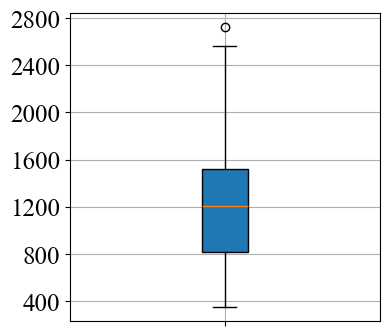

In [89]:
plt.figure(figsize=(4, 4))
bplot = plt.boxplot(df_dev_copy["mean_pitch"], patch_artist=True)
# for patch, color in zip(bplot['boxes'], ['lightcyan']):
#     patch.set_facecolor(color)
plt.yticks(range(400, 3000, 400), fontsize=18, fontname='Times New Roman')
plt.xticks(visible=False)
plt.grid()
plt.savefig("figs/box_plot_mean_pitch_dev.pdf", bbox_inches="tight")
plt.show()

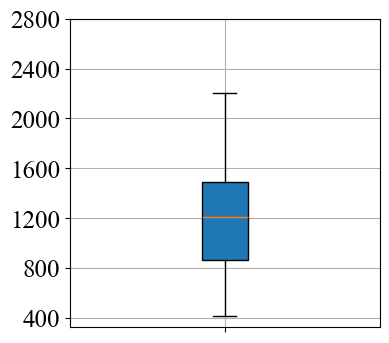

In [90]:

plt.figure(figsize=(4, 4))
bplot = plt.boxplot(df_eval_copy["mean_pitch"], patch_artist=True)
# for patch, color in zip(bplot['boxes'], ['lightcyan']):
#     patch.set_facecolor(color)
plt.yticks(range(400, 3000, 400), fontsize=18, fontname='Times New Roman')
plt.xticks(visible=False)
plt.grid()
plt.savefig("figs/box_plot_mean_pitch_eval.pdf", bbox_inches="tight")
plt.show()